The goal of this sheet is to work through the exercises in *Bayesian Data Analysis, Third Edition* by Gelman, Carlin, Stern, Dunson, Vehtari, and Rubin. Various datasets and solutions are available at http://www.stat.columbia.edu/~gelman/book/

**1**. Suppose you have a Beta(4, 4) prior distribution on the probability $\theta$ that a coin will yield a 'head' when spun in a specified manner. The coin is independently spun ten times, and 'heads' appear fewer than 3 times. You are not told how many heads were seen, only that the number is less than 3. Calculate your exact posterior density (up to a proportionality constant) for $\theta$ and sketch it.

$\newcommand{\given}{\;\lvert\;}$
We have
$$
\begin{align}
P(\theta \given y) &\propto P(y \given \theta) \cdot P(\theta) \\
&= \big( P(y = 0 \given \theta) + P(y = 1 \given \theta) + P(y = 2 \given \theta) \big) \cdot \beta(4, 4) \\
&= \big((1 - \theta)^{10} + 10 \cdot \theta(1 - \theta)^{9} + 45 \cdot \theta^{2}(1 - \theta)^{8} \big) \cdot \beta(4, 4)
\end{align}
$$
Note also that $\beta(4, 4) \propto \theta^{3} (1 - \theta)^{3}$, so we have
$$
(\theta \given y) \propto \big((1 - \theta)^{10} + 10 \cdot \theta(1 - \theta)^{9} + 45 \cdot \theta^{2}(1 - \theta)^{8} \big) \cdot \theta^{3} (1 - \theta)^{3}
$$

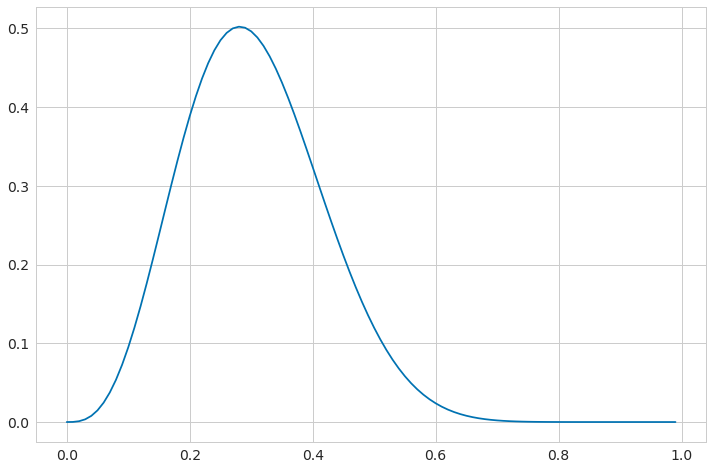

In [1]:
# Plot the top expression from above, using the beta distribution from scipy.stats

# Some plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 8), 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('colorblind', 8))

import scipy.stats as stats
import numpy as np
x = np.arange(0, 1, 0.01)
y = ((1 - x)**10 + 10 * x * (1 - x)**9 + 45 * x**2 * (1 - x)**8) * stats.beta.pdf(x, 4, 4)
plt.plot(x, y);

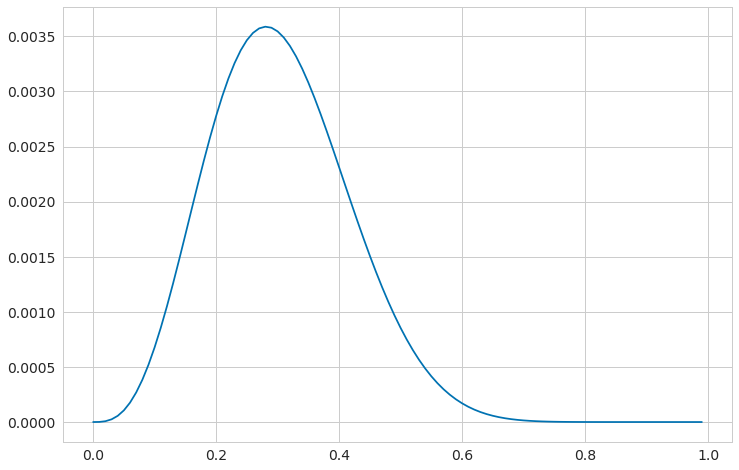

In [2]:
# Simplify the bottom expression, and plot it instead. As expected, the graph is the same
# up to the scaling of the y-axis.
from sympy import init_printing, lambdify
init_printing(use_unicode=True, wrap_line=False, no_global=True)
from sympy.abc import theta
simp = (((1 - theta)**10 + 10 * theta * (1 - theta)**9 + 45 * theta**2 * (1 - theta)**8) * 
        theta**3 * (1 - theta)**3).factor()
f = lambdify(theta, simp, "numpy")
plt.plot(x, f(x));
simp

**2**. Consider two coins $C_1, C_2$ with the following characteristics: $Pr(\text{ heads} \given C_1) = 0.6$ and
$Pr(\text{ heads} \given C_2) = 0.4$. Choose one of the coins at random and imagine spinning it repeatedly. Given that the first two spins from the chosen coin are tails, what is the expectation of the number of additional spins until a head shows up?

First we find the posterior distribution on $\theta = Pr(\text{ heads })$ given data $y$ of two consecutive tails.

Case 1: $\theta = 0.6$
$$
\begin{align}
P(\theta \given y) &= \frac{P(y \given \theta) P(\theta)}{P(y)} \\
                   &= \frac{(0.4)^2 \cdot (0.5)}{(0.5)(0.4)^2 + (0.5)(0.6)^2}
\end{align}
$$
Case 2: $\theta = 0.4$
$$
\begin{align}
P(\theta \given y) &= \frac{P(y \given \theta) P(\theta)}{P(y)} \\
                   &= \frac{(0.6)^2 \cdot (0.5)}{(0.5)(0.4)^2 + (0.5)(0.6)^2}
\end{align}
$$

In [3]:
from sympy import S, N
t1 = S(6) / 10
t2 = S(4) / 10
prior_t1 = prior_t2 = S(1) / 2

P_y = prior_t1 * (t1)**2 + prior_t2 * (t2)**2
posterior_t1 = (1 - t1)**2 * prior_t1 / P_y
posterior_t2 = (1 - t2)**2 * prior_t2 / P_y
(posterior_t1, posterior_t2), (N(posterior_t1), N(posterior_t2))

Let $n$ be the number of additional spins until a head appears. If we know $\theta$, then by definition 
$E(n \given \theta) = \sum_{i=1}^{\infty} i (1-\theta)^{i-1} \theta$.

To evaluate this, let  $$
\begin{align}
S     &= \sum_{i=1}^{\infty} i(1-x)^{i-1}x \text{ and }\\
f(x)  &= \frac{1}{1 - x} = \sum_{i=0}^{\infty} x^i
\end{align}
$$
By differentiating, we can get something close to $S$:
$$
\begin{align}
f'(x) &= -(1 - x)^{-2}(-1) = \frac{1}{(1 - x)^2} \\
      &= \sum_{i=1}^{\infty} i x^{i - 1}
\end{align}
$$
Now with a substitution and a multiplication, we can get what we want. Let $\tilde{x} = 1 - x$. Then $$
\begin{align}
x f'(\tilde{x}) &= \sum_{i=1}^\infty x i  (1 - x)^{i - 1} = S \\
                &= \frac{x}{(1 - (1 - x))^2} = \frac{1}{x}
\end{align}
$$

We are looking for 
$$
E(n \given y) = E\big(E(n \given y, \theta) \given y\big)
$$

We just found that $E(n \given y, \theta) = \frac{1}{\theta}$, so what we want is $$
E\left( \frac{1}{\theta} \given y \right)
$$
which is simply $$
\frac{P(\theta_1 \given y)}{\theta_1} + \frac{P(\theta_2 \given y)}{\theta_2}
$$

In [4]:
answer = posterior_t1 / t1 + posterior_t2 / t2
answer, N(answer)

**3**. Let $y$ be the number of 6's in 1000 rolls of a fair die.

**(a)** Sketch the approximate distribution of $y$, based on the normal distribution

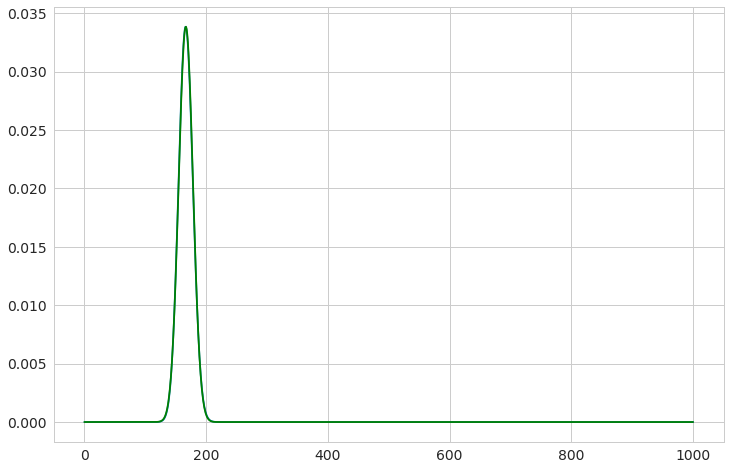

In [5]:
# Plot of exact distribution
from scipy.special import binom
p = 1/6
n = 1000
x = range(n + 1)
y_exact = [binom(n, k) * p**k * (1-p) ** (n-k) for k in x]
plt.plot(x, y_exact);

# Plot of normal approximation
y_approx = stats.norm.pdf(x, n * p, np.sqrt(n * p * (1 - p)))
plt.plot(x, y_approx, color='green');

**(b)** Give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of $y$.

In [6]:
# Exact values
quantiles = (0.05, 0.25, 0.5, 0.75, 0.95)
[min(idx for (idx, val) in enumerate(np.cumsum(y_exact)) if val >= q) for q in quantiles]

In [7]:
# Approximate values
answer = [stats.norm.ppf(q, loc=n*p, scale=np.sqrt(n*p*(1-p))) for q in quantiles]
print(', '.join(f'{_:.0f}' for _ in answer))

147, 159, 167, 175, 186


**4**. Let $\theta$ be the probability that a possibly biased die lands on $6$. Suppose the prior distribution for $\theta$ is $$
\begin{align}
Pr(\theta = 1/12) &= 1/4 \\
Pr(\theta = 1/6) &= 1/2 \\
Pr(\theta = 1/4) &= 1/4
\end{align}
$$
**(a)** Using the normal approximation for the conditional distributions, $p(y \given \theta)$, sketch your approximate prior predictive distribution for $y$.

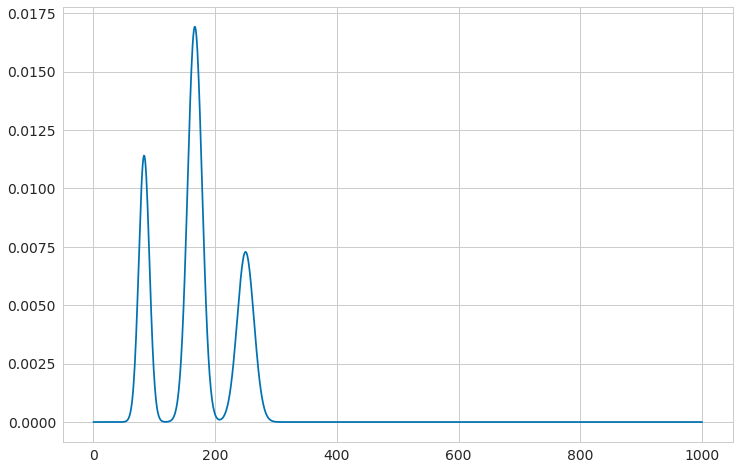

In [8]:
n = 1000; x = range(n + 1);
t1 = 1/12; prior_t1 = 1/4;
t2 = 1/6; prior_t2 = 1/2;
t3 = 1/4; prior_t3 = 1/4;
y_approx = lambda p: stats.norm.pdf(x, n * p, np.sqrt(n * p * (1 - p)))
y_pred = prior_t1 * y_approx(t1) + prior_t2 * y_approx(t2) + prior_t3 * y_approx(t3)
plt.plot(x, y_pred);

**(b)** Give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of $y$.

In [9]:
# We estimate the values directly, but note that treating this as three disjoint
# normal distributions with areas 1/4, 1/2, 1/4 will also work.
[min(idx for (idx, val) in enumerate(np.cumsum(y_pred)) if val >= q) for q in quantiles]

**5**. Let $y$ be the number of heads in $n$ spins of a coin whose probability of heads is $\theta$.

**(a)** If your prior distribution for $\theta$ is uniform on $[0, 1]$, derive your prior predictive distribution for $y$, $$
Pr(y = k) = \int_0^1 Pr(y = k \given \theta) \, d\theta
$$
for each $k = 0, 1, \ldots, n$.

$$
\int_0^1 Pr(y = k \given \theta) \, d\theta = \binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n - k} \, d\theta
$$
This integral is called a Beta integral, and it can be evaluated in terms of the [gamma function](https://en.wikipedia.org/wiki/Beta_function#Relationship_between_gamma_function_and_beta_function). 
$$
\int_0^1 \theta^k (1 - \theta)^{n - k} \, d\theta = 
  \frac{\Gamma(k + 1) \Gamma(n - k + 1)}{\Gamma(n + 2)}
$$
This evaluation is implied by the fact that the beta distribution
$$
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} 
                            \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}
$$
is, in fact, a distribution. Using the fact that, for integer $i$, $\Gamma(i) = (i - 1)!$ we have
$$
\int_0^1 Pr(y = k \given \theta) \, d\theta = \binom{n}{k} \frac{k! (n-k)!}{(n + 1)!} = \frac{1}{n + 1}.
$$

**(b)** Show that $\frac{\alpha + y}{\alpha + \beta + n}$ is between $\frac{\alpha}{\alpha + \beta}$ and $\frac{y}{n}$ for $0 \le y \le n$.

It suffices to show $\frac{a + c}{b + d}$ is between $\frac{a}{b}$ and $\frac{c}{d}$ when all are positive (the $y=0$ case is trivial). Assume WLOG $\frac{a}{b} \le \frac{c}{d} \implies ad \le bc$. Then
$$ab + ad \le ab + bc \implies a(b + d) \le b(a + c) \implies \frac{a}{b} \le \frac{a + c}{b + d}.$$
Similarly,
$$ad + cd \le bc + cd \implies (a + c) d \le (b + d) c \implies \frac{a + c}{b + d} \le \frac{c}{d}.$$

**(c)** Show that if the prior distribution on $\theta$ is uniform, the posterior variance is always less than the prior variance.

The uniform distribution has variance of $\frac{1}{12}$. We have $$
\begin{align}
Var(B(\alpha, \beta)) &= \frac{\alpha \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)} \\
&= \left(\frac{\alpha}{\alpha + \beta} \cdot \frac{\beta}{\alpha + \beta}\right)
                                       \cdot \frac{1}{\alpha + \beta + 1} \\
&< \left(\frac{1}{4} \right) \cdot \left(\frac{1}{3}\right) = \frac{1}{12},
\end{align}
$$
for $\alpha + \beta > 2$. (We used $x + y = 1 \implies xy \le \frac{1}{4}$).

**(d)** Give an example of $\alpha, \beta, y, n$ where the posterior variance is higher than the prior.

In [10]:
# Try a brute-force search on small examples
var = lambda a, b: a * b / ((a + b)**2 * (a + b + 1))
def loop(end):
    space = range(1, end)
    for y in space:
        for n in range(y, end):
            for a in space:
                for b in space:
                    prior = var(a, b)
                    posterior = var(a + y, b + n - y)
                    if posterior > prior:
                        return ((y, n, a, b), prior, posterior)
loop(5)                    

**6**. Derive the mean and variance of the negative binomial predictive distribution for the cancer rate example using the mean and variance formulas for conditional probabilities.

**7** **(a)** Show the uniform prior for the natural parameter of the exponential family $Bin(n, \theta)$ is $p(\theta) \propto \theta^{-1} (1 - \theta)^{-1}$.

We first rewrite $p(y \given n, \theta)$ in exponential form:
$$
\begin{align}
p(y \given n, \theta) &= \binom{n}{y} \theta^y (1 - \theta)^{n - y} \\
 &= \binom{n}{y} (1 - \theta)^{n} \left( \frac{\theta}{1 - \theta} \right)^y \\
 &= \binom{n}{y} (1 - \theta)^{n} e^{ y \ln \left( \frac{\theta}{1 - \theta} \right) }
\end{align}
$$

Describing the likelihood in the exponential form
$$
p(y \given n, \theta) = f(y) g(\theta) e^{\phi(\theta) u(y)}
$$
gives
$$\begin{align}
f(y) &= \binom{n}{y} \\
g(\theta) &= (1 - \theta)^n \\
\phi(\theta) &= \ln \left( \frac{\theta}{1 - \theta} \right) \\
u(y) &= y
\end{align}$$
and so $\phi(\theta) = \ln \left( \frac{\theta}{1 - \theta} \right)$ is the natural parameter. 

A uniform distribution on $p(\phi)$ gives a prior distribution on $\theta$:
$$\begin{align}
p_\phi(\phi) &\propto 1 \\
p_\theta(\theta) &=  p_\phi \left( \ln \frac{\theta}{1 - \theta} \right) \cdot
                \left| \frac{d}{d\theta} \left( \ln \frac{\theta}{1 - \theta} \right)  \right| \\
                &\propto 1 \cdot \frac{1}{\theta(1 - \theta)}.
\end{align}$$

**(b)** Show that if $y=0$ or $n$, the resulting posterior distribution is improper.

Putting the previous result back in exponential form we have 
$$\begin{align}
p(\theta) &\propto g(\theta)^\eta e^{\phi(\theta) \nu} \\
&= (1 - \theta)^{n \eta} e^{\nu \ln \left( \frac{\theta}{1 - \theta} \right) } \\
&= (1 - \theta)^{n \eta - \nu} \theta^{\nu} \\
&= (1 - \theta)^{-1} \theta^{-1}
\end{align}$$
which implies
$$\begin{align}
\eta &= \frac{-2}{n} \\
\nu &= -1
\end{align}$$
If we run a single trial (i.e., $n$ Bernoulli events with $y$ successes), the general machinery for exponential families states that we update to a posterior distribution using parameters
$$\begin{align}
\eta' &= \eta + 1\\
\nu' &= \nu + y.
\end{align}$$

It is straightforward to verify that this increases the power on $(1 - \theta)$ by $n - y$ and increases the power on $\theta$ by $y$. Hence if $y = 0$, we have 
$$
p(\theta \given y) \propto (1 - \theta)^{n - 1} \theta^{-1}
$$
which is improper. Equivalently, if $y = n$, we have
$$
p(\theta \given y) \propto (1 - \theta)^{-1} \theta^{n-1}
$$
which is also improper. With any other value of $y$, both powers will be non-negative, and we will have a proper beta distribution.